In [ ]:
# 구글 드라이브의 폴더와 구글 코랩 폴더 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 현재 경로 확인
!pwd

/content


In [ ]:
# drive/My Drive/Colab Notebooks 경로로 변경
%cd drive/My\ Drive/Colab\ Notebooks\

/content/drive/My Drive/Colab Notebooks


# Tensorflow 

In [39]:
import tensorflow as tf 

In [40]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
X_train.dtype

dtype('uint8')

In [41]:
# Normalization (min-max) => 최소값 0 최대값 1로 정규화를 한다 => 학습시 훨씬 더 효율적으로 할 수 있기 때문에 더 정확하고 빠르게 할 수 있다 
X_train = X_train / 255
X_test = X_test / 255

In [42]:
# 전처리는 model안에서

# Sequential 버전 
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Model 버전 
inputs_ = tf.keras.layers.Input(shape=(28,28))
x = tf.keras.layers.Flatten()(inputs_)
x = tf.keras.layers.Dense(128)(x)
x = tf.keras.layers.ReLU()(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

In [43]:
model = tf.keras.models.Model(inputs_, outputs)

In [44]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
re_lu_4 (ReLU)               (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.trainable_weights # 학습 가능한 가중치를 학습시킬 것이다

[<tf.Variable 'dense_2/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[ 0.02516936,  0.06438791,  0.018306  , ..., -0.01758076,
          0.06290304,  0.05140124],
        [-0.05912167, -0.01394046,  0.00835894, ...,  0.07631402,
         -0.02987464,  0.03332863],
        [-0.0592133 ,  0.03133401,  0.07544664, ...,  0.0805388 ,
         -0.07592296, -0.03545989],
        ...,
        [ 0.04126004,  0.02557782, -0.07374297, ..., -0.01776882,
          0.05950726,  0.03152514],
        [ 0.04481585, -0.01106533,  0.0462807 , ...,  0.02908169,
          0.02692767, -0.03776729],
        [ 0.00387245, -0.05717902,  0.07691073, ..., -0.03013743,
          0.04765027, -0.012512  ]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(128,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

## Loss function

```
모델은 학습을 할때 실제값 - 예측값을 최소화 하는 방향으로 학습을 하는데 
이때 loss function은 예측값이 실제값에 가까워지는지 판단하는 척도가 되는 함수이다 
```

In [14]:
tf.keras.losses.binary_crossentropy # parameter 변경 불가능, decorator로 기능을 확장할 수 있다 / 그대로 사용할 때 편리함 
tf.keras.losses.BinaryCrossentropy() # instance 하면서 완전히 다른 값을 가질 수 있다, subclass 상속을 통해서 다른 값을 가질 수 있다 / 인자를 바꾸거나 원하는 형태로 바꿀 때는 클래스 방식을 쓴다
tf.keras.losses.categorical_crossentropy
tf.keras.losses.CategoricalCrossentropy
tf.keras.losses.SparseCategoricalCrossentropy # one-hot-encoding을 내부적으로 해준다 
tf.keras.losses.sparse_categorical_crossentropy # partial을 굳이 사용하지 않고 one-hot-encoding을 할 수 있도록 클래스를 제공한다 

In [15]:
from functools import partial

In [16]:
def x(a,b):
  return a+b

In [17]:
x2 = partial(x, b=1) # 기존의 함수기능을 변경할 수 있다 

In [18]:
x2(3)

4

In [47]:
# compile은 내부적으로 computational graph로 바꾸어 lose function를 효율적으로 자동 미분하도록 도와준다  
# tf.keras.losses.categorical_crossentropy의 단축 표현 => categorical_crossentropy 단, 단축표현은 parameter 변경 불가능 
model.compile(loss=tf.keras.losses.categorical_crossentropy)

```python
compile(학습 설계) 할 때 필요한 파라미터 3가지 
1. loss function
2. optimizer => 자동 미분을 할 때 사용하는 방법 설정 
3. metrics => 평가 기준 설정 
```

In [ ]:
# 내가 원하는 값의 형태로 바꾸지 않는 지점까지를 logit이라고 한다 / from_logits=True는 logits으로 부터 실제값 - 예측값을 구하는 방법을 사용하겠다는 의미이다 
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='adam')

In [ ]:
'adam' # parameter 변경 불가능 
tf.keras.optimizers.Adam() # parameter 변경 가능

### Softmax

```
softmax는 numerical stability하지 않는 문제가 발생할 수 있다 
```

In [55]:
def softmax(logits): 
  exp = tf.exp(logits)
  return exp / tf.reduce_sum(exp)

In [56]:
softmax([10000.,0.]) # softmax는 지수연산을 하기 때문에 큰 값이 들어오면 쉽게 오버플로우가 발생한다 

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([nan,  0.], dtype=float32)>

In [57]:
softmax([1.,3.,2.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.09003057, 0.66524094, 0.24472848], dtype=float32)>

In [49]:
def softmax2(logits): # 큰 값이 들어갔을 때 오버플로우를 방지하는 방법 그러나 이 또한 문제가 있다
  exp = tf.exp(logits-tf.reduce_max(logits))
  return exp / tf.reduce_sum(exp)

In [50]:
softmax2([100000., 0.])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 0.], dtype=float32)>

In [51]:
softmax2([100.,3.,0.]) # 가장 큰값만 값을 가지고 나머지는 값을 못갖게 되는 일도 발생한다 

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 0., 0.], dtype=float32)>

In [59]:
softmax2([100.,300.,200.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 1., 0.], dtype=float32)>

In [63]:
softmax2([0.00011,0.000012,0.000014]) # 너무 작은 값이 들어가도 언더플로우가 발생하여 모두 동일한 비율로 들어가게 된다 

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.3333549 , 0.33332223, 0.3333229 ], dtype=float32)>

### 학습과정 설정 및 학습(compile & fit)

In [64]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              optimizer='adam', metrics=['acc'])

In [66]:
model.fit(X_train,y_train, epochs=2) # 학습 데이터와 epoch을 정해주면 학습이 가능하다 / default로 epoch=1, batch size = 32

Epoch 1/2
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5010 - acc: 0.8243
Epoch 2/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3774 - acc: 0.8643


In [69]:
X_train.shape # 6만개 데이터 

(60000, 28, 28)

In [70]:
60000/1875 # batch size

32.0

In [71]:
# loss, metrics return 
model.train_on_batch(X_train, y_train) # fit은 batch size만큼 train_on_batch가 실행된다 ex) 데이터 개수 = 60000, batch size=100 600번 train_on_batch실행 

[0.38287022709846497, 0.8614166378974915]

## GridSearch CV

```
Hyperparameter tuning 방법중 하나이다 
@@@
```

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
GridSearchCV(KNeighborsClassifier(), {'n_neighbors':[5,6,7,8,9,10]}) # 사용자가 지정한 파라미터를 반복문을 사용하는 것처럼 구해주는 방법 

## Callback

```
callback은 특정 상황에 대해서 그 결과를 판단할 수 있도록 결과값을 알려주는 기능 
```

In [75]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None): # signature를 동일하게 맞춰야 한다 
    print('epoch', epoch+1, '시작')

In [ ]:
dir(tf.keras.callbacks.Callback)

In [72]:
dir(tf.keras.callbacks)

['BaseLogger',
 'CSVLogger',
 'Callback',
 'CallbackList',
 'EarlyStopping',
 'History',
 'LambdaCallback',
 'LearningRateScheduler',
 'ModelCheckpoint',
 'ProgbarLogger',
 'ReduceLROnPlateau',
 'RemoteMonitor',
 'TensorBoard',
 'TerminateOnNaN',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'experimental']

In [76]:
h = model.fit(X_train,y_train, steps_per_epoch=100, epochs=2, callbacks=[MyCallback()])

Epoch 1/2
100/100 [==============================] - 0s 4ms/step - loss: 0.2951 - acc: 0.8926
epoch 1 시작
Epoch 2/2
100/100 [==============================] - 0s 4ms/step - loss: 0.2919 - acc: 0.8947
epoch 2 시작


In [87]:
inputs_ = tf.keras.layers.Input(shape=(28,28))
x = tf.keras.layers.Flatten()(inputs_)
x = tf.keras.layers.Dense(2)(x)
x = tf.keras.layers.ReLU()(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.models.Model(inputs_, outputs)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              optimizer='adam', metrics=['accuracy'])

In [88]:
model.weights[0] # 학습전 

<tf.Variable 'dense_14/kernel:0' shape=(784, 2) dtype=float32, numpy=
array([[ 0.0621696 ,  0.03114827],
       [ 0.05718201, -0.06315091],
       [ 0.01374986, -0.00775776],
       ...,
       [ 0.00518525,  0.02914727],
       [ 0.04352903, -0.05101464],
       [ 0.03367535,  0.01672252]], dtype=float32)>

In [89]:
model.fit(X_train, y_train)

1875/1875 [==============================] - 5s 2ms/step - loss: 1.3585 - accuracy: 0.4977


In [90]:
model.weights[0] # 학습 후 (epoch 1)

<tf.Variable 'dense_14/kernel:0' shape=(784, 2) dtype=float32, numpy=
array([[ 0.01506082,  0.07337335],
       [ 0.02667496, -0.08142766],
       [-0.03281154, -0.00934248],
       ...,
       [ 0.02592397,  0.03641215],
       [ 0.06711672, -0.02997859],
       [ 0.01211459,  0.00046465]], dtype=float32)>

In [91]:
model.fit(X_train, y_train, epochs=3) # 이전에 epoch이 한번 돌아갔으므로 총 epochs은 4번 돌린것과 같다 (mutable이기 때문)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9381 - accuracy: 0.6460
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8567 - accuracy: 0.6885
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8133 - accuracy: 0.7038


In [92]:
model.weights[0] # 학습 후 (epoch 4)

<tf.Variable 'dense_14/kernel:0' shape=(784, 2) dtype=float32, numpy=
array([[-0.04761839,  0.18095993],
       [-0.0655762 , -0.07643786],
       [-0.17626587,  0.11628444],
       ...,
       [ 0.15831317,  0.12745775],
       [ 0.0916123 ,  0.08825199],
       [ 0.03401611,  0.01437407]], dtype=float32)>

In [93]:
model.fit(X_train, y_train, initial_epoch=3, epochs=5) # initial epoch부터 다시 학습을 시작한다 

Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7889 - accuracy: 0.7098
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7734 - accuracy: 0.7145


In [21]:
model.fit(X_train, y_train, epochs=2, verbose=2)  # 숫자가 커지면 표현되는 정보가 줄어든다 

Epoch 1/2
1875/1875 - 3s - loss: 0.9043
Epoch 2/2
1875/1875 - 3s - loss: 0.8777


In [22]:
model.fit(X_train, y_train, epochs=2, verbose=3) 

Epoch 1/2
Epoch 2/2


In [94]:
h = model.fit(X_train, y_train, initial_epoch=5, epochs=20, validation_split=0.3) # 학습을 하면 항상 history callback 이다 

Epoch 6/20
1313/1313 [==============================] - 6s 4ms/step - loss: 0.7630 - accuracy: 0.7176 - val_loss: 0.7644 - val_accuracy: 0.7236
Epoch 7/20
1313/1313 [==============================] - 6s 4ms/step - loss: 0.7571 - accuracy: 0.7197 - val_loss: 0.7743 - val_accuracy: 0.7108
Epoch 8/20
1313/1313 [==============================] - 6s 4ms/step - loss: 0.7529 - accuracy: 0.7206 - val_loss: 0.7593 - val_accuracy: 0.7146
Epoch 9/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.7485 - accuracy: 0.7202 - val_loss: 0.7564 - val_accuracy: 0.7232
Epoch 10/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.7454 - accuracy: 0.7230 - val_loss: 0.7620 - val_accuracy: 0.7138
Epoch 11/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.7426 - accuracy: 0.7242 - val_loss: 0.7688 - val_accuracy: 0.7273
Epoch 12/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.7410 - accuracy: 0.7253 - val_loss: 0.7562 - val_accura

In [28]:
'history' in dir(h)

True

In [95]:
h.history

{'accuracy': [0.7176190614700317,
  0.7197142839431763,
  0.7205952405929565,
  0.7201666831970215,
  0.7230238318443298,
  0.7241904735565186,
  0.7253095507621765,
  0.7251666784286499,
  0.7272857427597046,
  0.7277857065200806,
  0.7300238013267517,
  0.7295714020729065,
  0.7314285635948181,
  0.7308571338653564,
  0.7302857041358948],
 'loss': [0.7630206346511841,
  0.7571397423744202,
  0.7528698444366455,
  0.7484991550445557,
  0.7454163432121277,
  0.7425763607025146,
  0.7409718632698059,
  0.7382715940475464,
  0.7360761165618896,
  0.7342188358306885,
  0.7329500913619995,
  0.7321329712867737,
  0.7303406000137329,
  0.7287805080413818,
  0.7271991968154907],
 'val_accuracy': [0.7235555648803711,
  0.710777759552002,
  0.714555561542511,
  0.7232221961021423,
  0.7138333320617676,
  0.7272777557373047,
  0.7229999899864197,
  0.7211666703224182,
  0.7227222323417664,
  0.7279999852180481,
  0.7307778000831604,
  0.7286111116409302,
  0.7163888812065125,
  0.73000001907348

In [96]:
import pandas as pd

In [97]:
pd.DataFrame(h.history)

,loss,accuracy,val_loss,val_accuracy
0,0.763021,0.717619,0.764350,0.723556
1,0.757140,0.719714,0.774328,0.710778
2,0.752870,0.720595,0.759297,0.714556
3,0.748499,0.720167,0.756395,0.723222
4,0.745416,0.723024,0.761951,0.713833
5,0.742576,0.724190,0.768764,0.727278
6,0.740972,0.725310,0.756249,0.723000
7,0.738272,0.725167,0.764873,0.721167
8,0.736076,0.727286,0.752897,0.722722
9,0.734219,0.727786,0.749965,0.728000


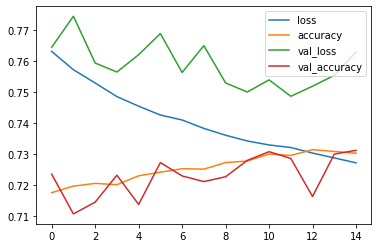

In [98]:
pd.DataFrame(h.history).plot.line()